In [50]:
import pandas as pd

data = pd.read_csv('kidney_stone.csv')
data.head(10)

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
5,1.020,5.27,668,25.3,252,3.34,0
6,1.012,5.62,461,17.4,195,1.40,0
7,1.029,5.67,1107,35.9,550,8.48,0
8,1.015,5.41,543,21.9,170,1.16,0
9,1.021,6.13,779,25.7,382,2.21,0


In [51]:
data.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.018114,6.028481,612.848101,20.813924,266.405063,4.138987,0.430380
std,0.007239,0.724307,237.514755,7.938994,131.254550,3.260051,0.498293
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,413.000000,14.150000,160.000000,1.460000,0.000000
50%,1.018000,5.940000,594.000000,21.400000,260.000000,3.160000,0.000000
75%,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


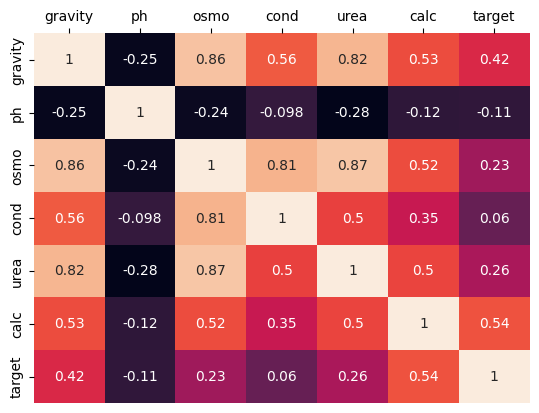

In [52]:
import seaborn as sns

correlation = data.corr()
columns_names = data.columns
axes = sns.heatmap(correlation, xticklabels=columns_names, yticklabels=columns_names, annot=True, cbar=False)
axes.xaxis.tick_top()
# Some features are very week corelated to target, especially ph and cond, perhaps it will be necessery to drop that data.

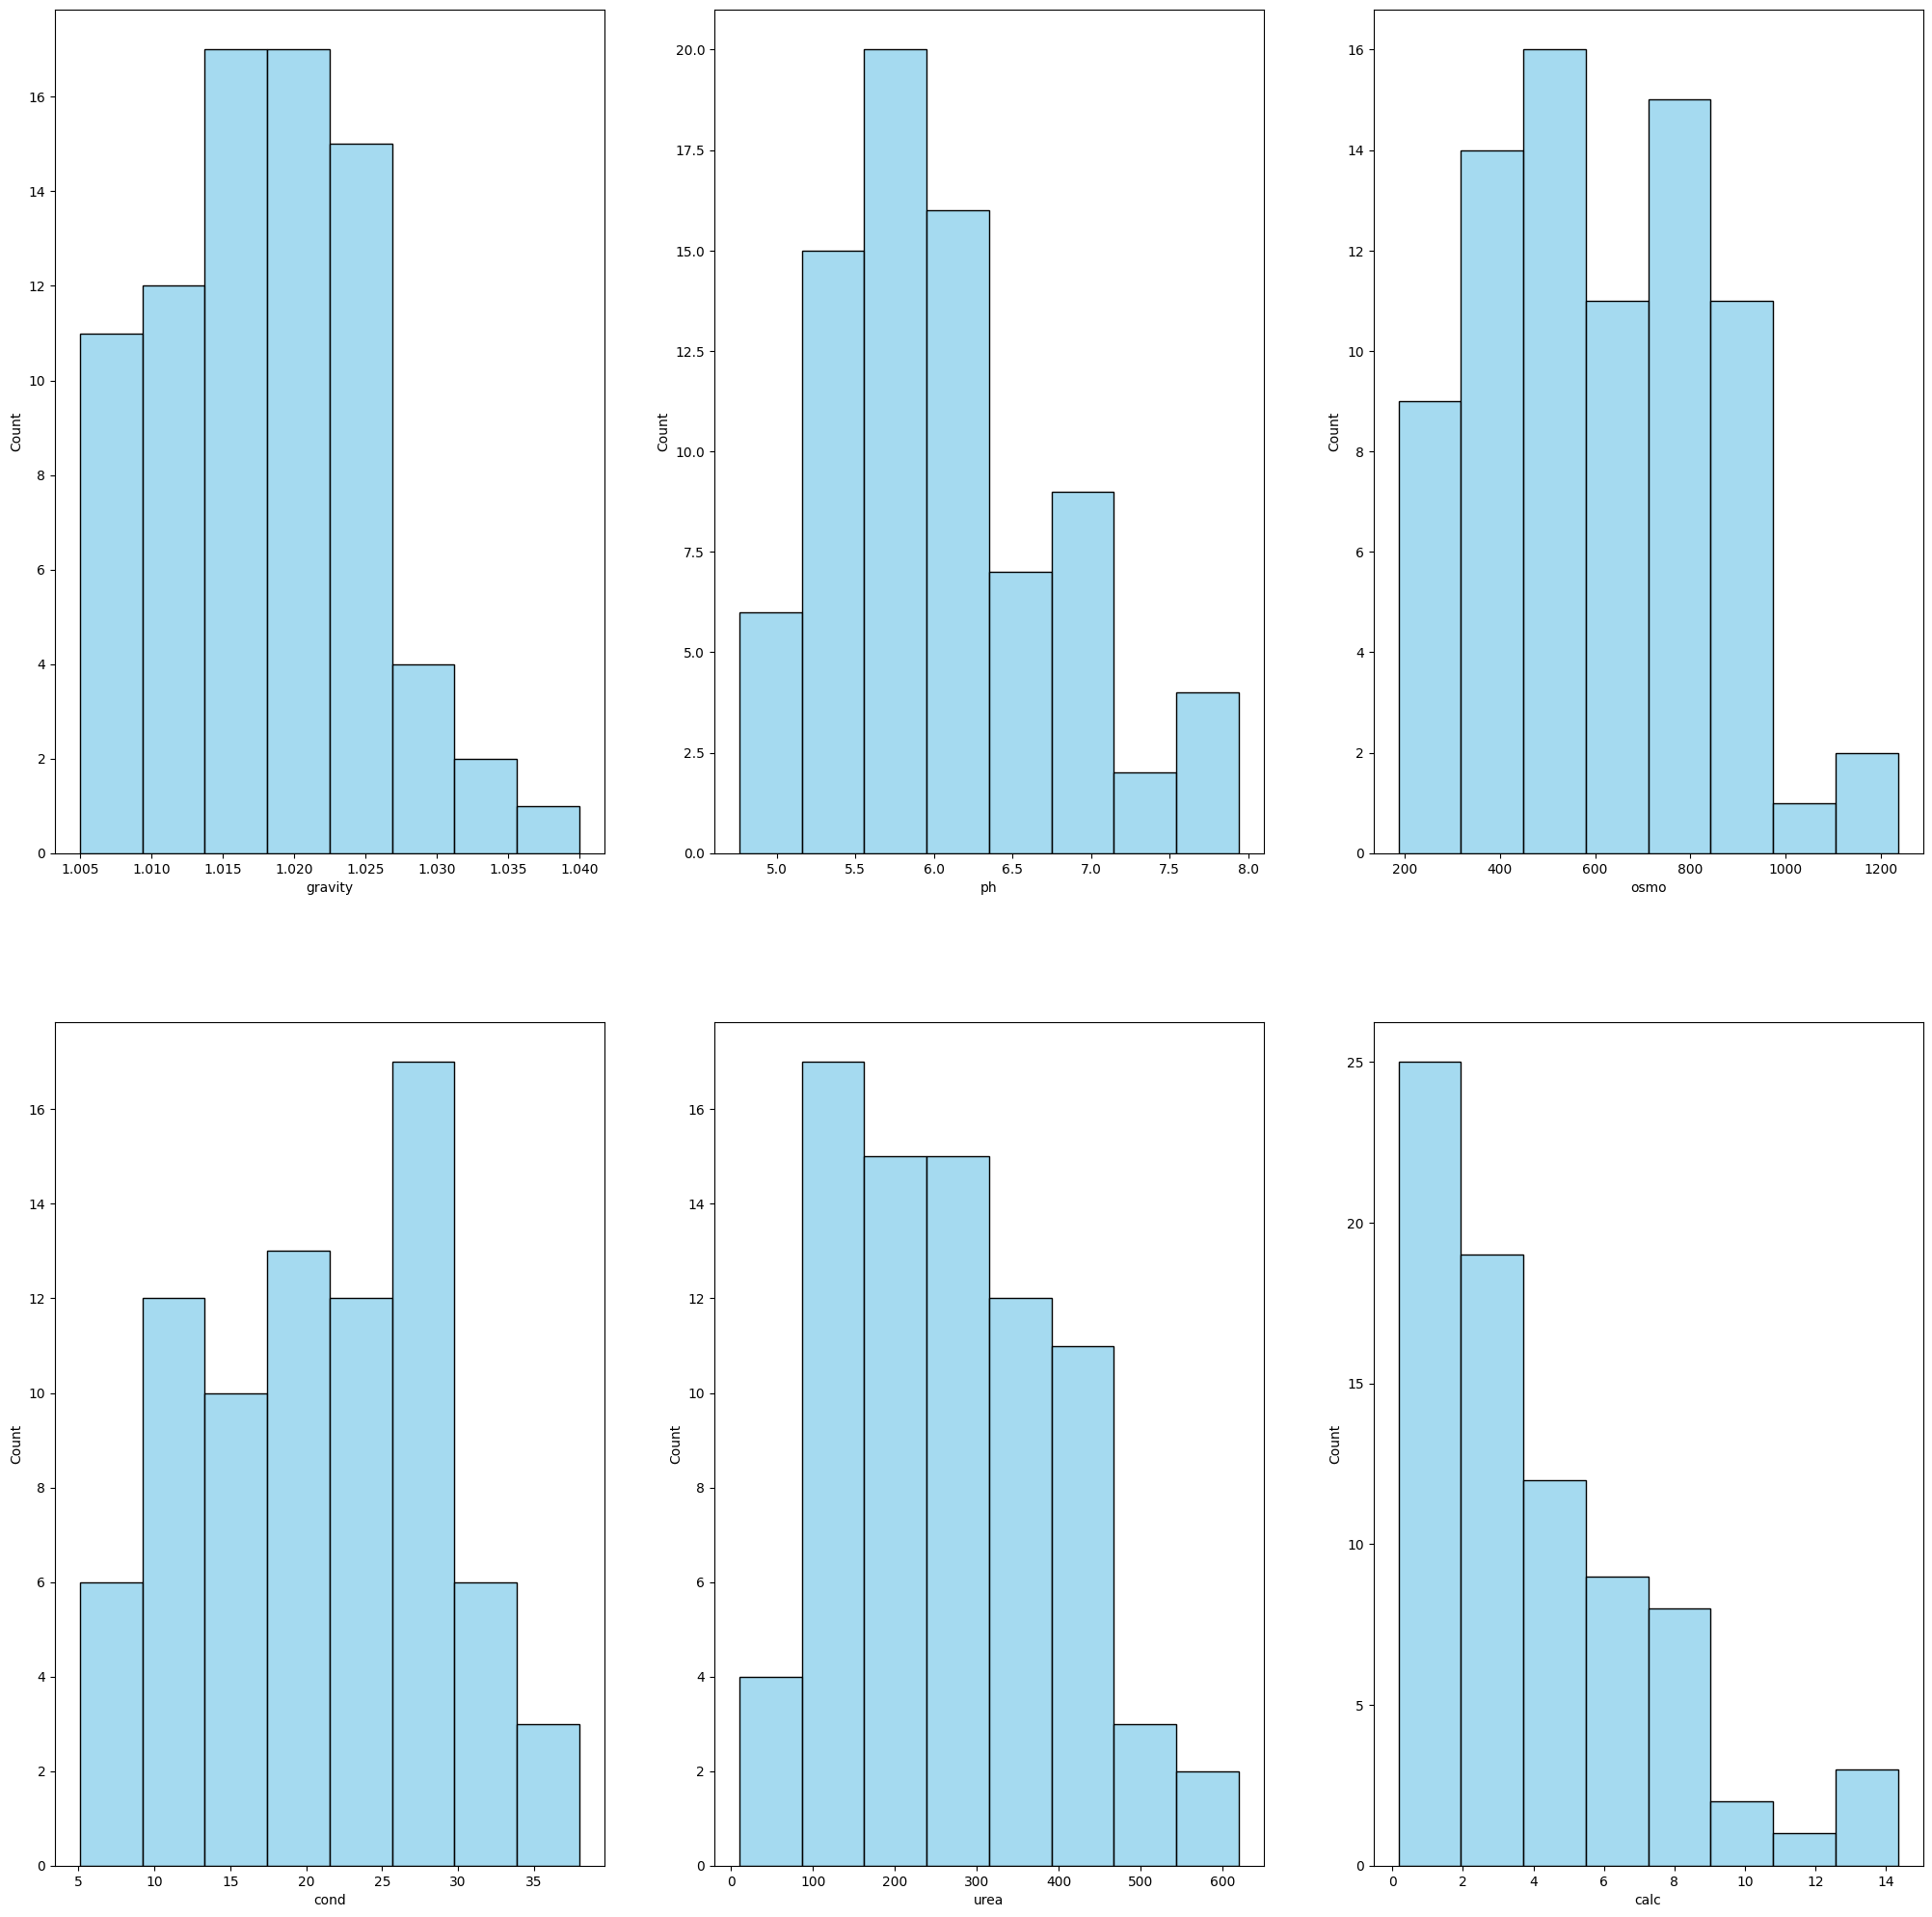

In [53]:
import matplotlib.pyplot as plt

columns_names = data.columns

figure, axes = plt.subplots(2, 3, figsize=(25, 25))
for ax, column_name in zip(axes.flat, columns_names):
    sns.histplot(data[column_name], color="skyblue", ax=ax, legend=False).set(xlabel=column_name)
# Data rather not are normally distributed, some can by, with skewness, but some are completly not, like calc.

In [54]:
from sklearn.preprocessing import RobustScaler

features = data.drop(['target'], axis=1)
target = data['target']

scaler = RobustScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)
scaled_features = pd.DataFrame(scaled_features, columns=features.columns)

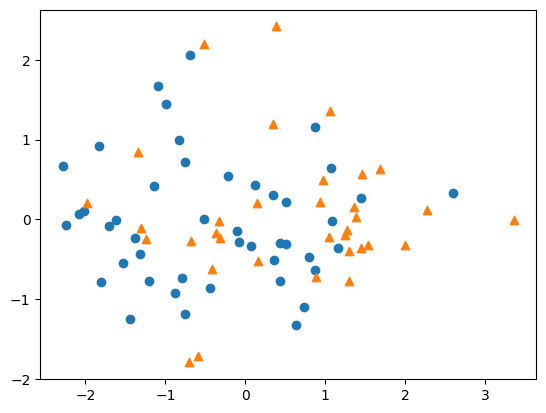

In [56]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


# reduce number of dimension, to visualize in scatter plot
pca = PCA(n_components=2, random_state=42)
dimensionaly_reducted_features = pca.fit_transform(scaled_features)

labels, labels_sign = (0, 1), ('o', '^')
for label, sign in zip(labels, labels_sign):
    dm_red_labeled_features = dimensionaly_reducted_features[target == label]
    plt.scatter(x=dm_red_labeled_features[:, 0], y=dm_red_labeled_features[:, 1], marker=sign)
# Problem is certainly not linear separable, points with same labels are slightly closer to others, but labels are generaly mixed.


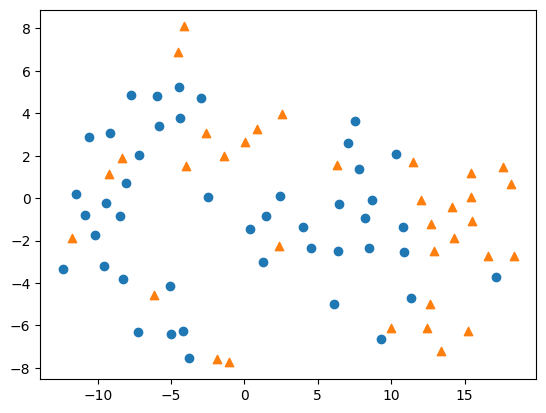

In [59]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=15)
non_lin_red_features = tsne.fit_transform(scaled_features)

labels, labels_sign = (0, 1), ('o', '^')
for label, sign in zip(labels, labels_sign):
    dm_red_labeled_features = non_lin_red_features[target == label]
    plt.scatter(x=dm_red_labeled_features[:, 0], y=dm_red_labeled_features[:, 1], marker=sign)

# Looks hard to separate, nonlinear technics probably will not give better result.


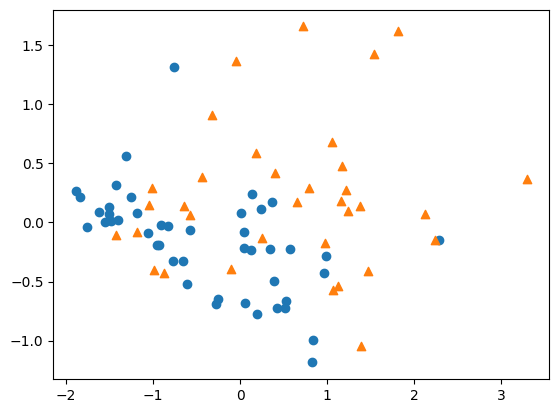

In [60]:
correlated_scaled_features = scaled_features.drop(['ph', 'cond'], axis=1)
dimensionaly_reducted_features = pca.fit_transform(correlated_scaled_features)

labels, labels_sign = (0, 1), ('o', '^')
for label, sign in zip(labels, labels_sign):
    dm_red_labeled_features = dimensionaly_reducted_features[target == label]
    plt.scatter(x=dm_red_labeled_features[:, 0], y=dm_red_labeled_features[:, 1],marker=sign)
    # Slightly better than with low_corelated features.

In [ ]:
# I decided to train knn model, and logistic refresion with PolynomialFeatures.
# The data are grouped in small claster, what is a reason for use knn.
# creating new features with PolynomialFeatures can reveal some nonlinear interaction between data,
# and regularization, durning logistic regresion can show new fetures importance.